In [14]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.plots as plots
from astropy.time import Time

/home/docmaf/stack/python/miniconda3-4.5.4/envs/lsst-scipipe-10a4fa6/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [15]:
class CountAboveMetric(metrics.BaseMetric):
    """Count the number of visit under certain conditions. Multiple conditions should be provided as a list."""
    
    def __init__(self, col, threshold, **kwargs):
        super(CountAboveMetric, self).__init__(col=col, **kwargs)
        self.colname = col
        self.threshold = threshold
        
    def run(self, dataSlice, slicePoint=None):
        
        if type(self.colname) == list:
            
            #If the threshold does not have the same length as the column names, give prompt.
            if len(self.colname) != len(self.threshold):
                print('Error! The number of the thresholds should be the same as the required columns.')
            
            else:                       
                for i in range(len(self.colname)):
                    if i == 0:
                        # Look for the indices of the data that fullfil the criteria. 
                        index = np.nonzero(dataSlice[self.colname[i]] > self.threshold[i])[0]
                    else: 
                        indexCurrent = np.nonzero(dataSlice[self.colname[i]] > self.threshold[i])[0]
                        index = np.intersect1d(index, indexCurrent)

                count = len(index)
                return count
        
        else: # If only one limitation is provided.
            index = np.nonzero(dataSlice[self.colname] > self.threshold)[0]
            count = len(index)
            return count

Exception: Redefining metric __main__.CountAboveMetric! (there are >1 metrics with the same name)

In [3]:
opsdb = db.OpsimDatabase('baseline2018a.db')
outDir = 'outDir'
resultsDb = db.ResultsDb(outDir=outDir)

In [47]:
def GetDateRange(Year1, Season):

    if Season == 'spring' or Season == 'Spring':
        Date1 = '02-04'
        Date2 = '05-05'
    elif Season == 'summer' or Season == 'Summer':
        Date1 = '05-06'
        Date2 = '08-07'
    elif Season == 'autumn' or Season == 'Autumn':
        Date1 = '08-08'
        Date2 = '11-06'
    elif Season == 'winter' or Season == 'Winter':
        Date1 = '11-07'
        Date2 = '02-03'
    else:
        print('Please enter a season!')
        

    Time1 = str(Year1) + '-' + Date1
    if Season == 'winter' or Season == 'Winter':
        Year1 = Year1+1
    Time2 = str(Year1) + '-' + Date2

    t1 = Time(Time1, format='isot', scale='utc')
    t2 = Time(Time2, format='isot', scale='utc')
    MJD1 = t1.mjd
    MJD2 = t2.mjd
    
    return 'observationStartMJD > ' + str(MJD1) + ' and ' 'observationStartMJD < ' + str(MJD2)

In [28]:
def RunRutine(DateRange):
    m = CountAboveMetric(['airmass', 'fiveSigmaDepth'], [1.1, 23])
    Slicer = slicers.HealpixSlicer(nside=8)
    Sqlconstraint = DateRange + ' and proposalId=3'

    mb = metricBundles.MetricBundle(m, Slicer, Sqlconstraint)
    resultdsDb = db.ResultsDb(outDir=outDir)
    BundleDict = {'Count': mb}

    group = metricBundles.MetricBundleGroup(BundleDict,opsdb,outDir=outDir, resultsDb=resultsDb)
    group.runAll()
    mb.plot(plotFunc=plots.HealpixSkyMap(), savefig=True)
    

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint observationStartMJD > 59979.0 and observationStartMJD < 60069.0 and proposalId=3 for columns ['airmass', 'fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 60464 visits
Running:  ['Count']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


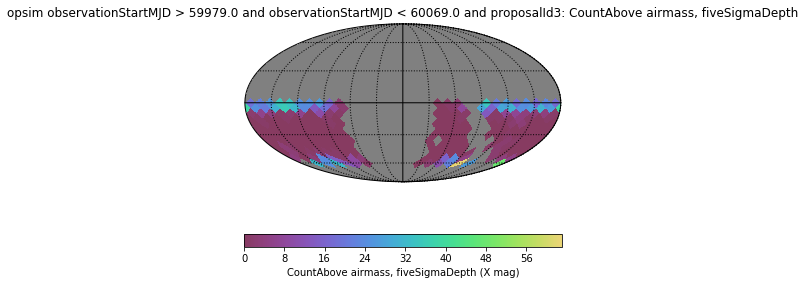

In [48]:
#Set inquire years
Year1 = 2023
#Year2 = 2024
Season = 'spring'

DateRange = GetDateRange(Year1, Season)

RunRutine(DateRange)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint observationStartMJD > 60070.0 and observationStartMJD < 60163.0 and proposalId=3 for columns ['airmass', 'fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 43878 visits
Running:  ['Count']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


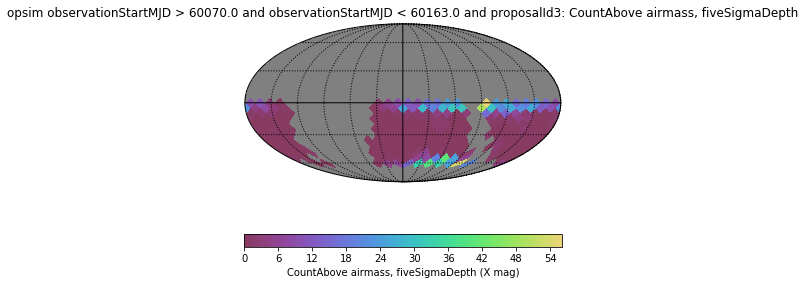

In [49]:
#Set inquire years
Year1 = 2023
#Year2 = 2024
Season = 'summer'

DateRange = GetDateRange(Year1, Season)

RunRutine(DateRange)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint observationStartMJD > 60164.0 and observationStartMJD < 60254.0 and proposalId=3 for columns ['airmass', 'fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 40355 visits
Running:  ['Count']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


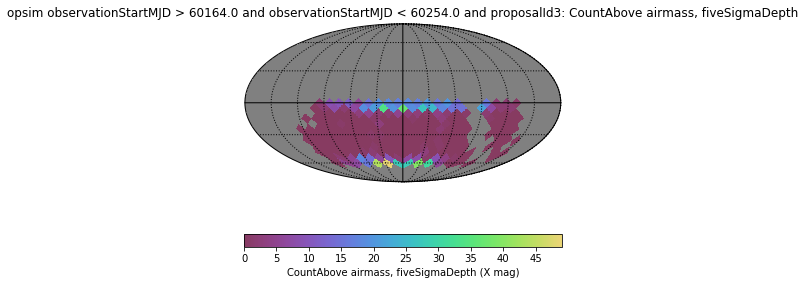

In [52]:
#Set inquire years
Year1 = 2023
#Year2 = 2024
Season = 'autumn'

DateRange = GetDateRange(Year1, Season)

RunRutine(DateRange)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database SummaryAllProps with constraint observationStartMJD > 60255.0 and observationStartMJD < 60343.0 and proposalId=3 for columns ['airmass', 'fieldRA', 'fiveSigmaDepth', 'fieldDec']
Found 46680 visits
Running:  ['Count']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


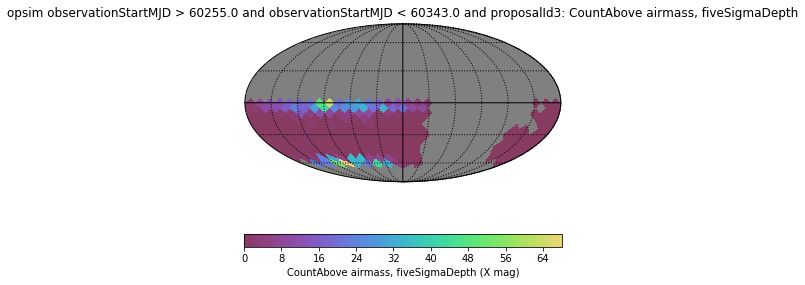

In [53]:
#Set inquire years
Year1 = 2023
#Year2 = 2024
Season = 'winter'

DateRange = GetDateRange(Year1, Season)

RunRutine(DateRange)